# This script is to try out tabular examples




### XGBoost and a single tree regression model

In [1]:
import numpy as np
import xgboost
from sklearn.linear_model import LinearRegression
import pandas as pd
import shap

Example

In [1]:
N = 2_000
X = np.zeros((N, 5))

X[:1_000, 0] = 1

X[:500, 1] = 1
X[1_000:1_500, 1] = 1

X[:250, 2] = 1
X[500:750, 2] = 1
X[1_000:1_250, 2] = 1
X[1_500:1_750, 2] = 1

# mean-center the data
X[:, 0:3] -= 0.5

y = 2 * X[:, 0] - 3 * X[:, 1]

NameError: name 'np' is not defined

It does not work for my model because y should be the same with X the table

### Fitting a Linear Simulation with XGBoost

##### example

In [5]:
import numpy as np
import sklearn
import xgboost
from sklearn.model_selection import train_test_split

import shap
N = 10000
M = 10
np.random.seed(0)
X = np.random.randn(N, M)
beta = np.random.randn(M)
y_margin = X @ beta
y = y_margin

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_strain, X_valid, y_strain, y_valid = train_test_split(X_train, y_train)

##### My dataset

In [8]:
# read the excel file that contains all the molecular features (13 molecular features, two Y variables)

df = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp_hbond151123.xlsx")

# define X variables

X = df.drop(['Condition','Number','temp','IS','pH','Tm','ln(v)','Classifier'],axis = 1)

# define y varialbe

y = df['ln(v)']

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_strain, X_valid, y_strain, y_valid = train_test_split(X_train, y_train)

#### train a depth 1 model

In [23]:

model_depth1 = xgboost.XGBRegressor(
    max_depth=1,
    learning_rate=0.01,
    subsample=0.5,
    n_estimators=10000,
    base_score=y_strain.mean(),
)
model_depth1.fit(
    X_strain,
    y_strain,
    eval_set=[(X_valid, y_valid)],
    eval_metric="logloss",
    verbose=1000,
    early_stopping_rounds=20,
)

[0]	validation_0-logloss:1.92058
[235]	validation_0-logloss:-184.23323


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


XGBRegressor(base_score=0.27067350523826644, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [10]:
shap_values = shap.TreeExplainer(model_depth1).shap_values(X_test)
shap_interaction_values = shap.TreeExplainer(model_depth1).shap_interaction_values(
    X_test
)

[17:20:04] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[17:20:04] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


##### Summary bar plot shows the global importance of each feature

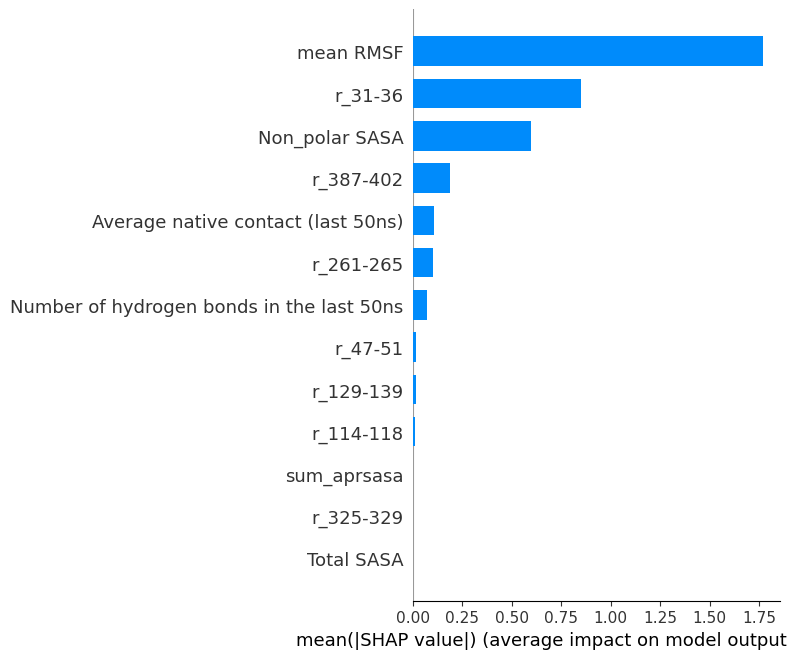

In [11]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

##### Summary bee-swarm plot shows the global importance of each feature and the distribution of effect sizes

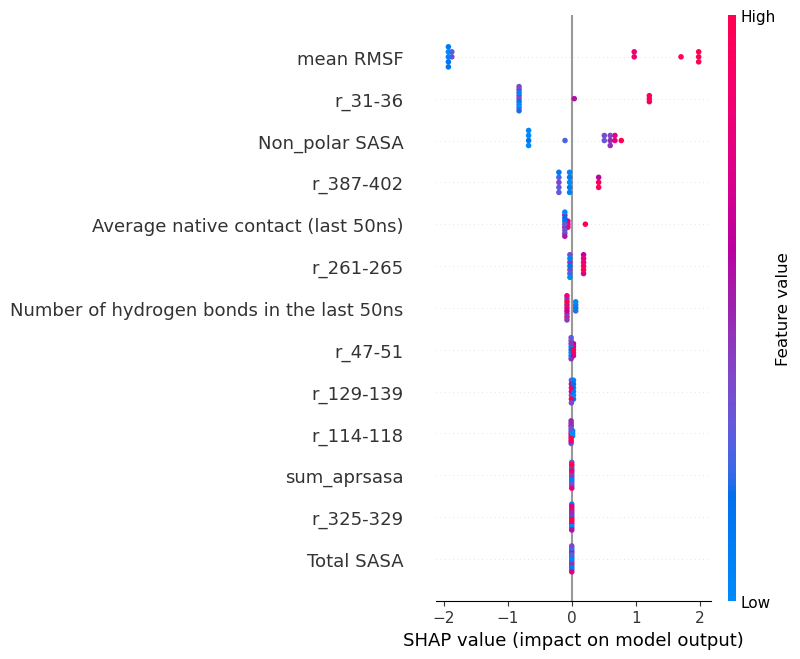

In [12]:
shap.summary_plot(shap_values, X_test)

##### The dependence plot for the top feature shows that XGBoost captured most the linear relationship

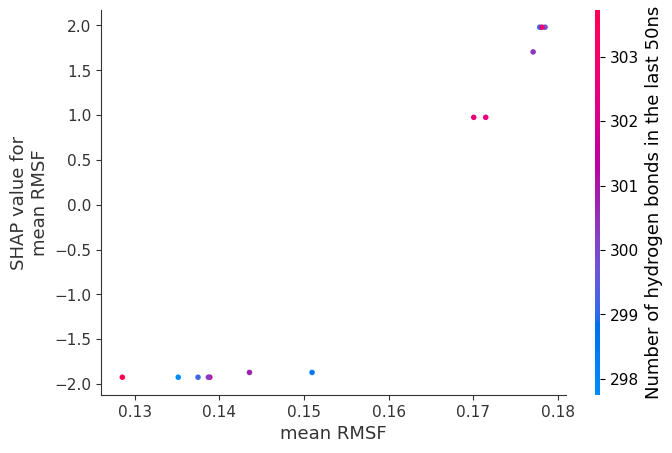

In [22]:
shap.dependence_plot(12, shap_values, X_test)

#### Train a depth 3 model

In this simulation (the example https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Fitting%20a%20Linear%20Simulation%20with%20XGBoost.html) we know that the true relationships are linear without any interactions. However when we fit trees with depth greater than 1, we are telling the model to look for interactions. When we explain our depth 3 model we see that it did learn some weak (incorrect) interactions.

In [24]:
model_depth3 = xgboost.XGBRegressor(
    learning_rate=0.02,
    subsample=0.2,
    colsample_bytree=0.5,
    n_estimators=5000,
    base_score=y_strain.mean(),
)
model_depth3.fit(
    X_strain,
    y_strain,
    eval_set=[(X_valid, y_valid)],
    eval_metric="logloss",
    verbose=500,
    early_stopping_rounds=20,
)

[0]	validation_0-logloss:2.09304
[103]	validation_0-logloss:-187.44430


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


XGBRegressor(base_score=0.27067350523826644, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [25]:
e3 = shap.TreeExplainer(model_depth3)
shap_values3 = e3.shap_values(X_test)
shap_interaction_values3 = shap.TreeExplainer(model_depth3).shap_interaction_values(
    X_test
)

[17:24:17] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[17:24:17] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


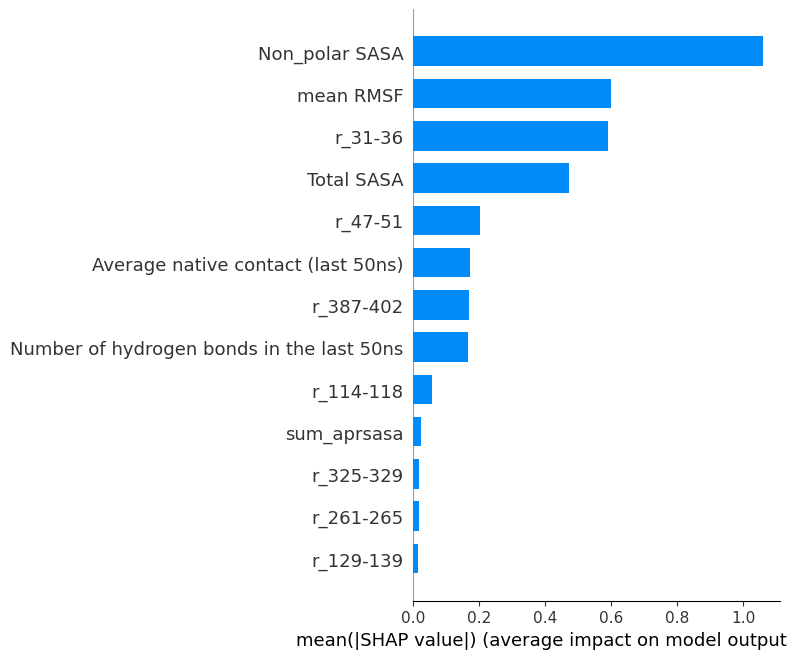

In [26]:
shap.summary_plot(shap_values3, X_test, plot_type="bar")

##### The bee-swarm summary plots are smoother than with the depth 1 model (see to dependency plots for why).

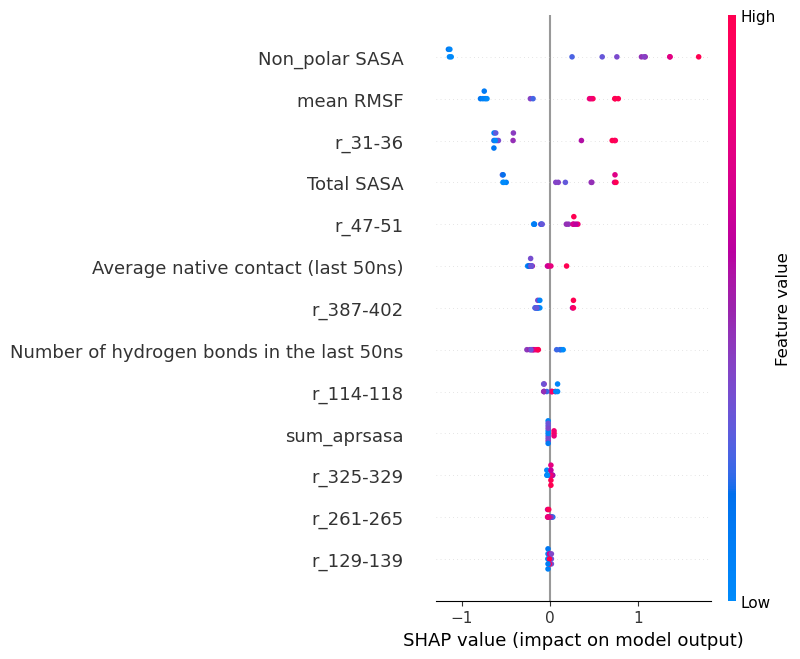

In [27]:
shap.summary_plot(shap_values3, X_test)

### Fitting a Linear Simulation with XGBoost - without RMSF

In [32]:
# read the excel file that contains all the molecular features (13 molecular features, two Y variables)

df = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp_hbond151123.xlsx")

# define X variables

X = df.drop(['Condition','Number','temp','IS','pH','Tm','ln(v)','Classifier','mean RMSF'],axis = 1)

# define y varialbe

y = df['ln(v)']

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_strain, X_valid, y_strain, y_valid = train_test_split(X_train, y_train)

#### Depth 1 model

[0]	validation_0-logloss:-0.17547
[323]	validation_0-logloss:-78.25523


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[17:30:59] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[17:30:59] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


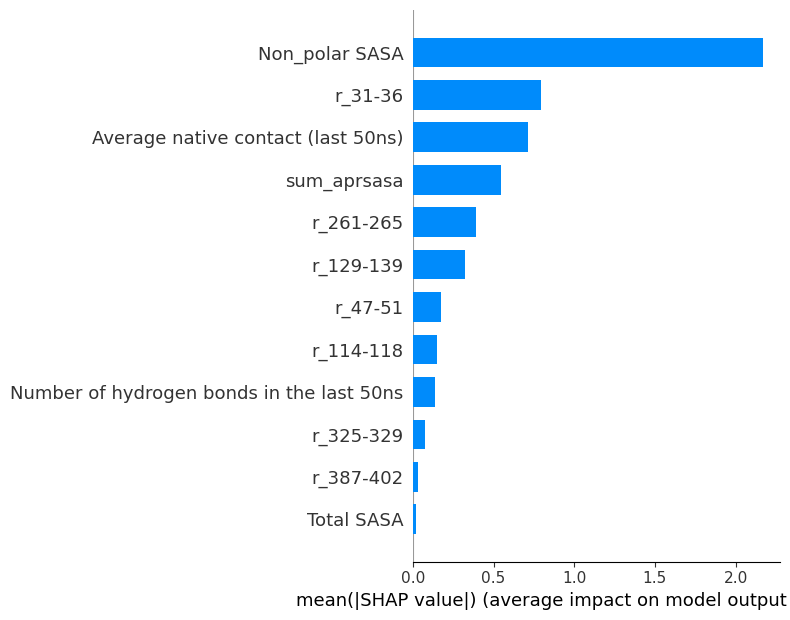

In [33]:

model_depth1 = xgboost.XGBRegressor(
    max_depth=1,
    learning_rate=0.01,
    subsample=0.5,
    n_estimators=10000,
    base_score=y_strain.mean(),
)
model_depth1.fit(
    X_strain,
    y_strain,
    eval_set=[(X_valid, y_valid)],
    eval_metric="logloss",
    verbose=1000,
    early_stopping_rounds=20,
)


shap_values = shap.TreeExplainer(model_depth1).shap_values(X_test)
shap_interaction_values = shap.TreeExplainer(model_depth1).shap_interaction_values(
    X_test
)

shap.summary_plot(shap_values, X_test, plot_type="bar")

#### Depth 3 model

In [34]:
model_depth3 = xgboost.XGBRegressor(
    learning_rate=0.02,
    subsample=0.2,
    colsample_bytree=0.5,
    n_estimators=5000,
    base_score=y_strain.mean(),
)
model_depth3.fit(
    X_strain,
    y_strain,
    eval_set=[(X_valid, y_valid)],
    eval_metric="logloss",
    verbose=500,
    early_stopping_rounds=20,
)

[0]	validation_0-logloss:0.04190
[178]	validation_0-logloss:-77.74768


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


XGBRegressor(base_score=0.18626260797241104, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
e3 = shap.TreeExplainer(model_depth3)
shap_values3 = e3.shap_values(X_test)
shap_interaction_values3 = shap.TreeExplainer(model_depth3).shap_interaction_values(
    X_test
)

[17:31:59] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[17:31:59] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


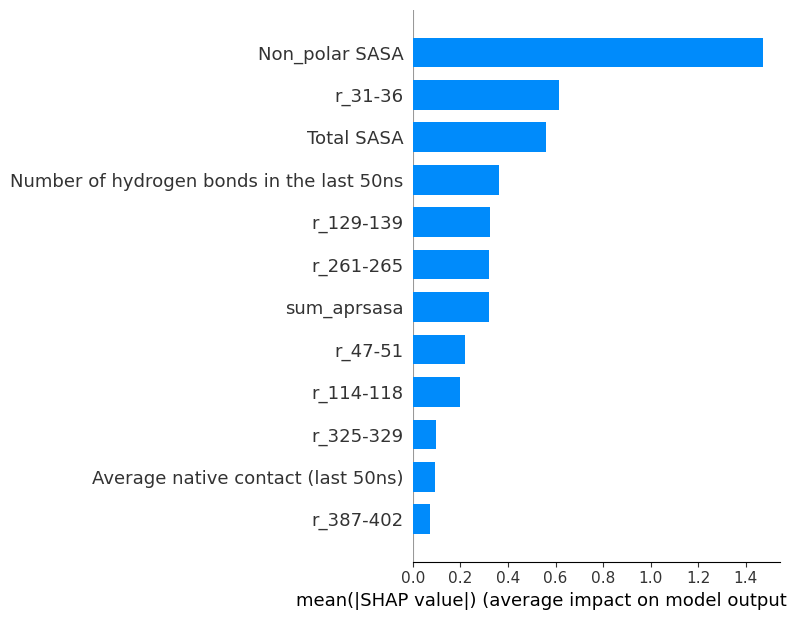

In [36]:
shap.summary_plot(shap_values3, X_test, plot_type="bar")

### Front page example (XGBoost)

##### without RMSF

[19:04:38] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


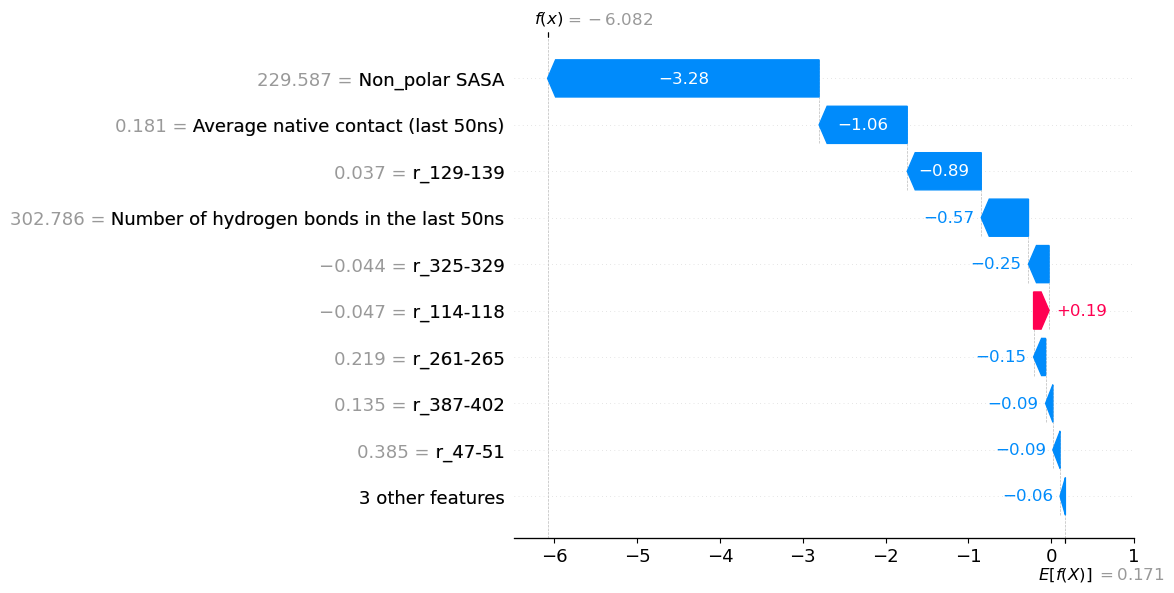

In [9]:
import numpy as np
import xgboost
from sklearn.linear_model import LinearRegression
import shap
import pandas as pd


# read the excel file that contains all the molecular features (13 molecular features, two Y variables)

df = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp_hbond151123.xlsx")

# define X variables

X = df.drop(['Condition', 'Number', 'temp', 'IS', 'pH', 'Tm', 'ln(v)', 'Classifier', 'mean RMSF'], axis=1)

# define y varialbe

y = df['ln(v)']


# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [10]:
shap.plots.initjs()
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [11]:
# visualize all the training set predictions
shap.plots.force(shap_values[:500])

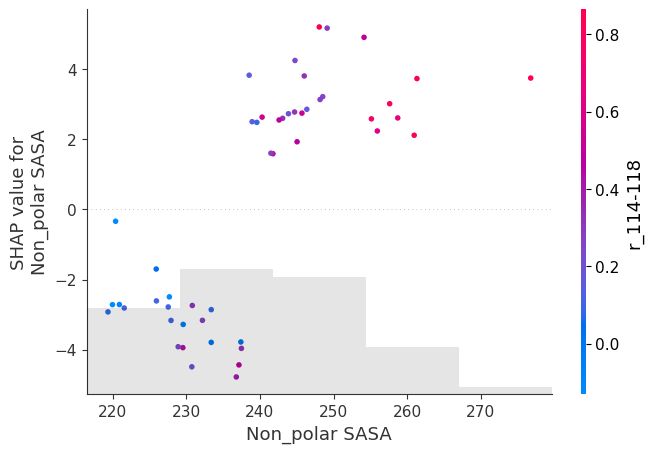

In [13]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Non_polar SASA"], color=shap_values)

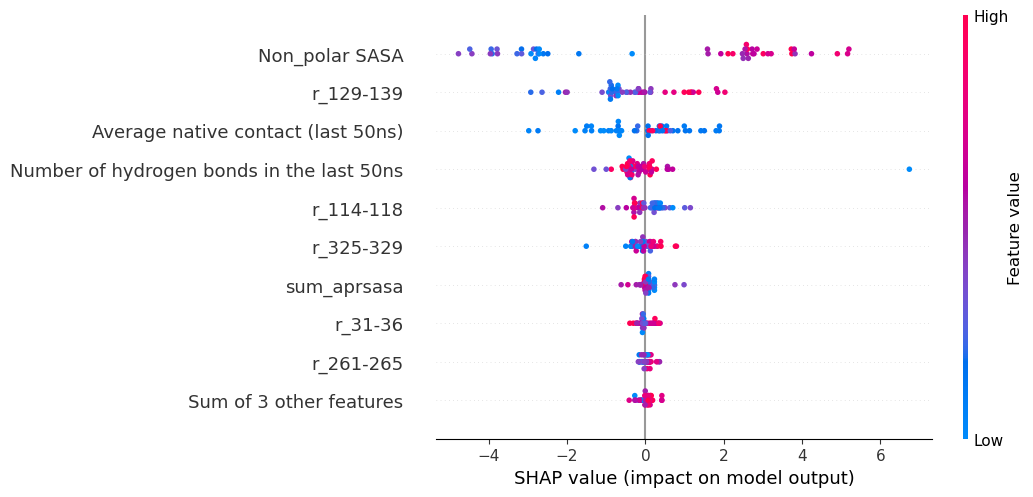

In [14]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

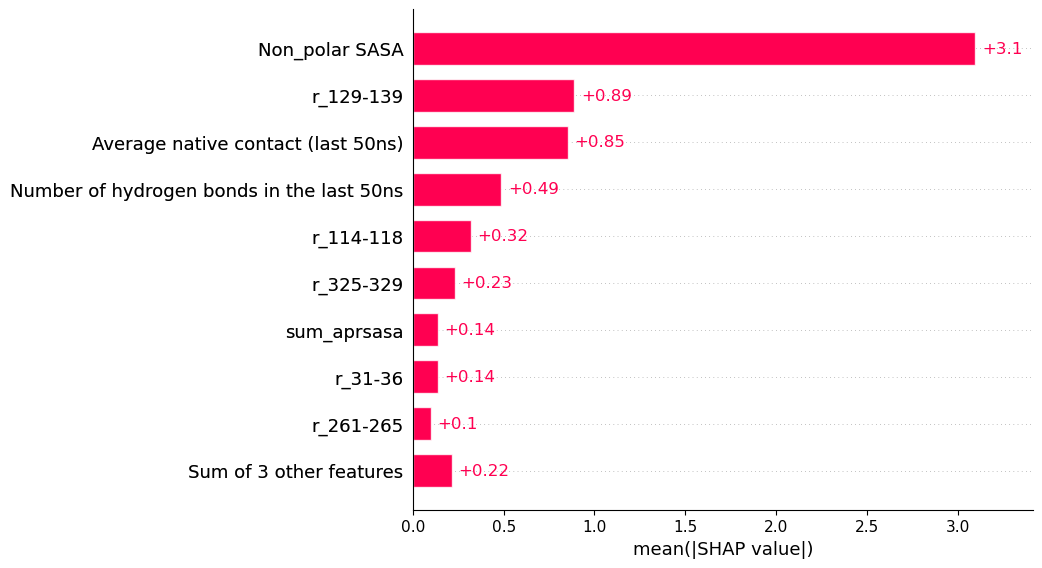

In [15]:
shap.plots.bar(shap_values)

##### with RMSF

[19:02:58] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


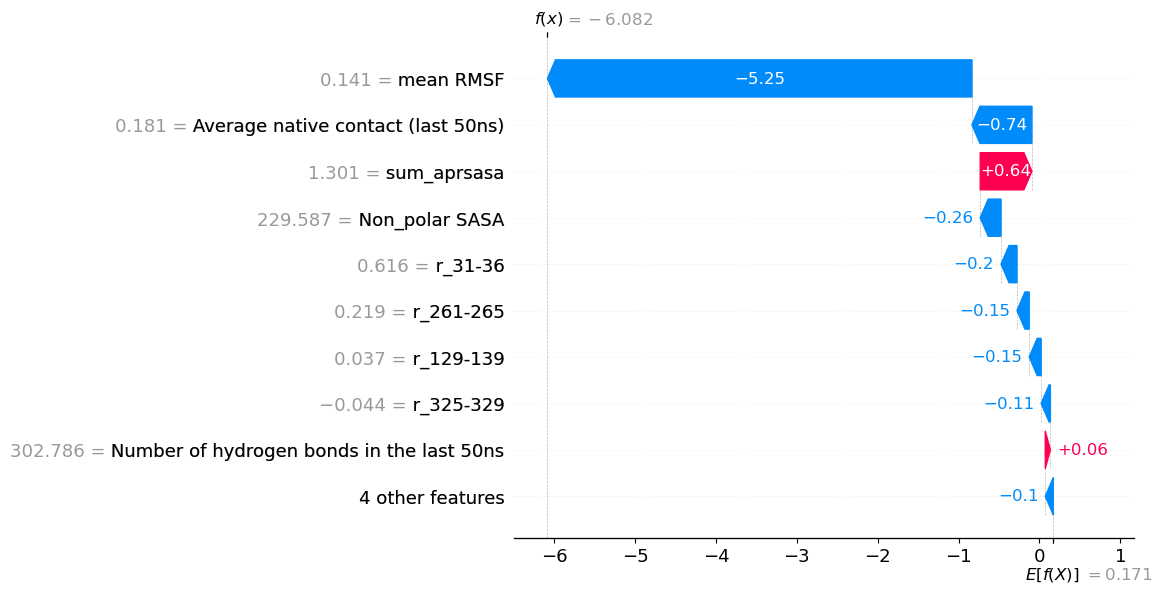

In [3]:
import numpy as np
import xgboost
from sklearn.linear_model import LinearRegression
import shap
import pandas as pd


# read the excel file that contains all the molecular features (13 molecular features, two Y variables)

df = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_temp_hbond151123.xlsx")

# define X variables

X = df.drop(['Condition', 'Number', 'temp', 'IS', 'pH', 'Tm', 'ln(v)', 'Classifier'], axis=1)

# define y varialbe

y = df['ln(v)']


# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualizbe the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [4]:
shap.plots.initjs()

In [5]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [6]:
# visualize all the training set predictions
shap.plots.force(shap_values[:500])

### With all the 15 features I have - 23/01/24

##### with RMSF

[19:19:08] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


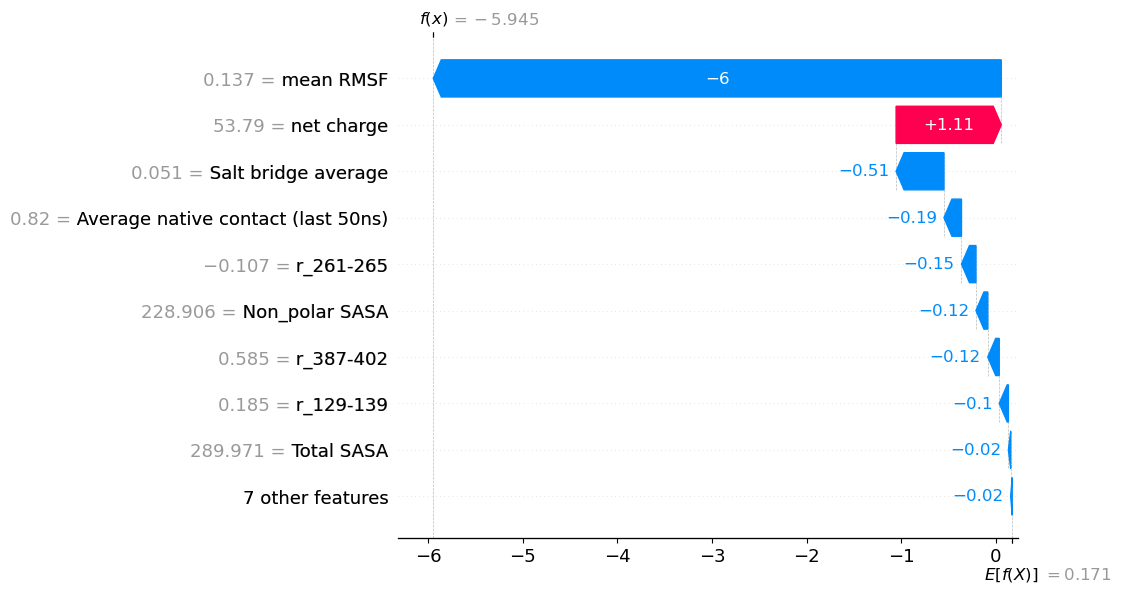

In [16]:
import numpy as np
import xgboost
from sklearn.linear_model import LinearRegression
import shap
import pandas as pd


# read the excel file that contains all the molecular features (13 molecular features, two Y variables)

df = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_hbond_Dsasa_saltbridge230124.xlsx")

# define X variables

X = df.drop(['Condition', 'Number', 'temp', 'IS', 'pH', 'Tm', 'ln(v)'], axis=1)

# define y varialbe

y = df['ln(v)']


# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualizbe the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [17]:
shap.plots.initjs()
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [18]:
# visualize all the training set predictions
shap.plots.force(shap_values[:500])

##### without RMSF

[19:22:21] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


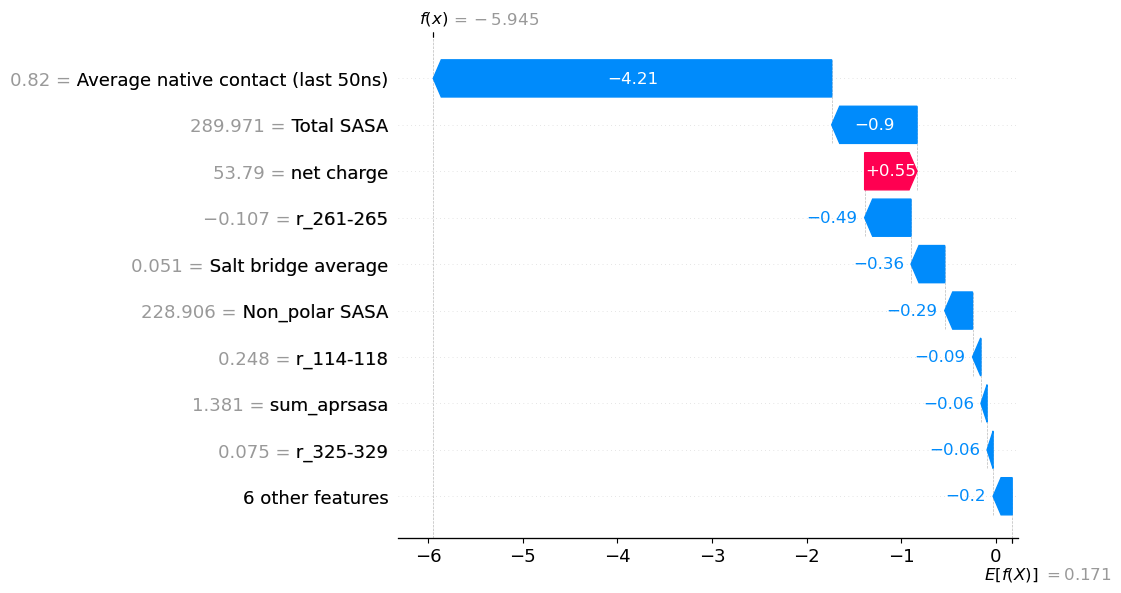

In [19]:
import numpy as np
import xgboost
from sklearn.linear_model import LinearRegression
import shap
import pandas as pd


# read the excel file that contains all the molecular features (13 molecular features, two Y variables)

df = pd.read_excel("mean_rmsf_nc_sasa_agg_total_sasa_hbond_Dsasa_saltbridge230124.xlsx")

# define X variables

X = df.drop(['Condition', 'Number', 'temp', 'IS', 'pH', 'Tm', 'ln(v)',"mean RMSF"], axis=1)

# define y varialbe

y = df['ln(v)']


# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualizbe the first prediction's explanation
shap.plots.waterfall(shap_values[0])